# **Overview**

In this project, I will use a dataset containing census information from the 1994 Census database to create a logistic regression model that predicts whether or not a person makes more than $50,000.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# prompt: upload file

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving income_data.csv to income_data.csv
User uploaded file "income_data.csv" with length 3844060 bytes


In [3]:
income_df = pd.read_csv('income_data.csv')
income_df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


We see that the dataframe is missing column names

In [7]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'work_hours_per_week', 'native_country', 'income']

In [8]:
# add column headers to the dataframe
income_df.columns = columns
income_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,work_hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  32560 non-null  int64 
 1   workclass            32560 non-null  object
 2   fnlwgt               32560 non-null  int64 
 3   education            32560 non-null  object
 4   education_num        32560 non-null  int64 
 5   marital_status       32560 non-null  object
 6   occupation           32560 non-null  object
 7   relationship         32560 non-null  object
 8   race                 32560 non-null  object
 9   sex                  32560 non-null  object
 10  capital_gain         32560 non-null  int64 
 11  capital_loss         32560 non-null  int64 
 12  work_hours_per_week  32560 non-null  int64 
 13  native_country       32560 non-null  object
 14  income               32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
#Clean columns by stripping extra whitespace for columns of type "object"
for c in income_df.select_dtypes(include=['object']).columns:
    income_df[c] = income_df[c].str.strip()
print(income_df.head())

   age         workclass  fnlwgt  education  education_num  \
0   50  Self-emp-not-inc   83311  Bachelors             13   
1   38           Private  215646    HS-grad              9   
2   53           Private  234721       11th              7   
3   28           Private  338409  Bachelors             13   
4   37           Private  284582    Masters             14   

       marital_status         occupation   relationship   race     sex  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

   capital_gain  capital_loss  work_hours_per_week native_country income  
0             0             0                   13  United-States  <=50K  
1             0             0   

In [13]:
#Check Class Imbalance
print('positivity rate :', income_df['income'].value_counts()['>50K'] / len(income_df['income']))

positivity rate : 0.24081695331695332


looks like our positivity rate is a bit far from 0.5, which means our data is imbalanced. Class imbalance can be checked in another way as well:

In [17]:
print(income_df.income.value_counts(normalize=True))

income
<=50K    0.759183
>50K     0.240817
Name: proportion, dtype: float64


In [19]:
#Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital_gain', 'capital_loss', 'sex','race', 'work_hours_per_week', 'education']

X = pd.get_dummies(income_df[feature_cols])

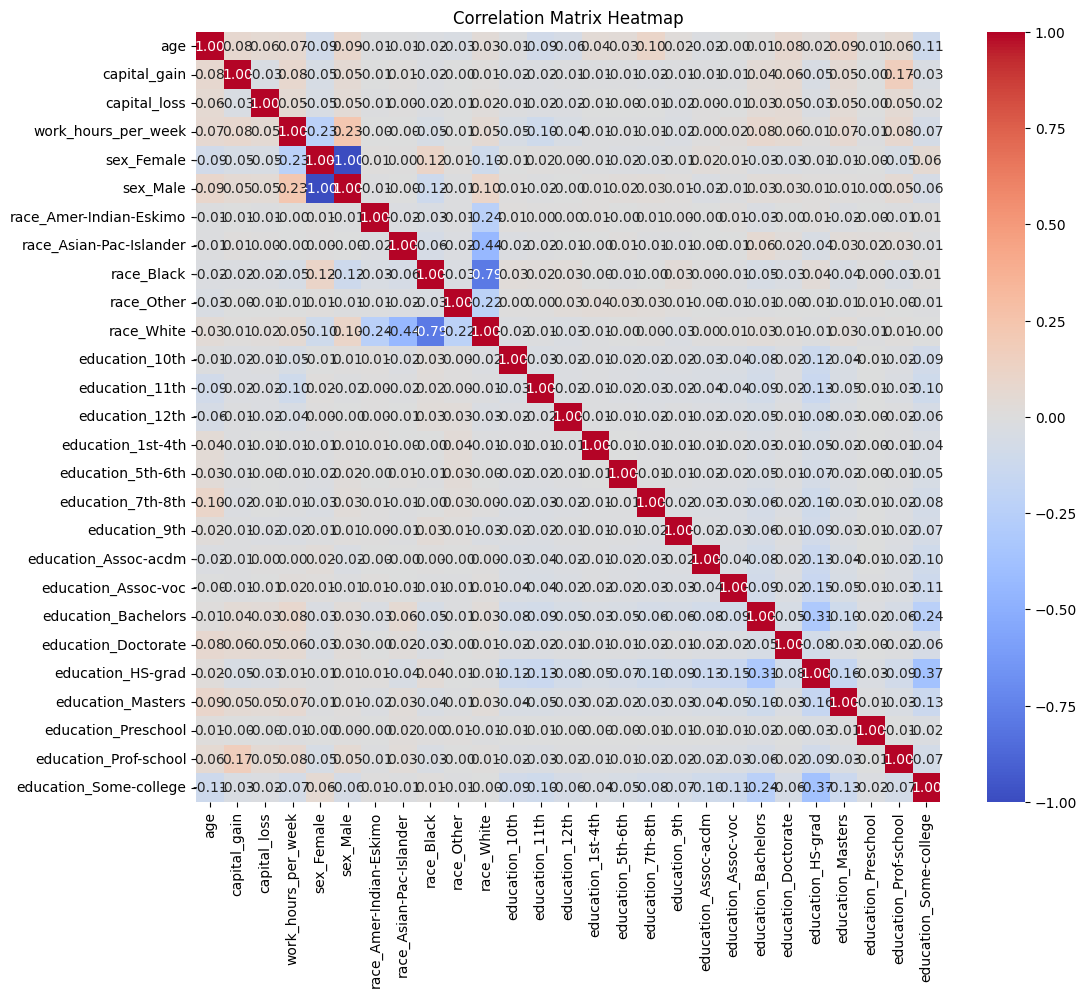

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' is your dataframe with numerical features
correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

It is clear that our feature variables are independent

In [21]:
# y = income_df['income']  here the values will be 1 for '>50K' and 0 for '<=50K'

y = income_df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# **Logistic Regression Models and Evaluation**

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size= .2)

# Fit LR model with sklearn on train set, and predicting on the test set
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [23]:
print('Model Parameters, Intercept:', log_reg.intercept_)

print('Model Parameters, Coeff:', log_reg.coef_)

Model Parameters, Intercept: [-4.26331098]
Model Parameters, Coeff: [[ 3.71602440e-02  3.15387535e-04  6.65299609e-04  3.15690395e-02
  -1.12909200e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.23379678e-01  0.00000000e+00  1.56400740e-01 -9.33554125e-01
  -9.05478641e-01 -1.97990705e-01 -2.85423582e-01 -7.72581303e-01
  -1.35920016e+00 -8.19299520e-01  1.93903079e-01  2.43351405e-01
   9.26998398e-01  1.52168301e+00 -3.24894523e-01  1.26450254e+00
   0.00000000e+00  1.44584453e+00  0.00000000e+00]]


In [28]:
coef_df = pd.DataFrame(zip(x_train.columns, np.transpose(log_reg.coef_)))
coef_df.columns = ['features', 'coef']
print(coef_df)

                   features                      coef
0                       age    [0.037160243960101993]
1              capital_gain  [0.00031538753518565153]
2              capital_loss   [0.0006652996092379142]
3       work_hours_per_week    [0.031569039536683836]
4                sex_Female     [-1.1290919962833437]
5                  sex_Male                     [0.0]
6   race_Amer-Indian-Eskimo                     [0.0]
7   race_Asian-Pac-Islander                     [0.0]
8                race_Black    [-0.22337967781426116]
9                race_Other                     [0.0]
10               race_White     [0.15640073988053343]
11           education_10th     [-0.9335541247924086]
12           education_11th     [-0.9054786407701683]
13           education_12th     [-0.1979907046902846]
14        education_1st-4th    [-0.28542358154677755]
15        education_5th-6th     [-0.7725813034459602]
16        education_7th-8th     [-1.3592001589720868]
17            education_9th 

The magnitude of coefficients shows some differences among certain groups. Age has slight but positive impact on personal income, meaning that the older the better income. Both capital gain and loss have very small influence. Work hours per week have also positive but small effect on the income level.

Gender gap is noticeable as females are more likely to have income level under 50k than males. The race variable also shows the income gap between black and white people. While black population is 0.22 times more likely to have under 50k income level, white folks have 0.15 times chance to have above the 50k.

Moreover, higher education levels such as doctorate and masters affect positively on personal income whereas people with high school education tend to fall in the category of under 50K income.

In [30]:
# Sort the coef_df DataFrame by the 'coef' column in descending order
coef_df_sorted = coef_df.sort_values('coef', ascending=False)

print(coef_df_sorted)

                   features                      coef
21      education_Doctorate      [1.5216830078011763]
25    education_Prof-school      [1.4458445316382211]
23        education_Masters      [1.2645025356406536]
20      education_Bachelors       [0.926998398029753]
19      education_Assoc-voc     [0.24335140509708333]
18     education_Assoc-acdm     [0.19390307932674633]
10               race_White     [0.15640073988053343]
0                       age    [0.037160243960101993]
3       work_hours_per_week    [0.031569039536683836]
2              capital_loss   [0.0006652996092379142]
1              capital_gain  [0.00031538753518565153]
24      education_Preschool                     [0.0]
26   education_Some-college                     [0.0]
9                race_Other                     [0.0]
7   race_Asian-Pac-Islander                     [0.0]
6   race_Amer-Indian-Eskimo                     [0.0]
5                  sex_Male                     [0.0]
13           education_12th 

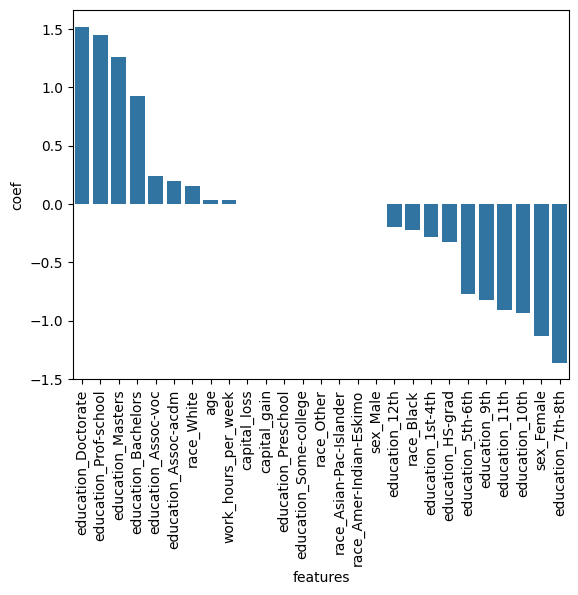

In [34]:
# Visualization on coefficients
coef_df_sorted['coef'] = coef_df_sorted['coef'].astype(float)
sns.barplot(x='features', y='coef', data=coef_df_sorted)
plt.xticks(rotation=90)
# Show the plot
plt.show()

In [29]:
# Evaluate the model's predictions on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
[[4766  224]
 [ 894  628]]
Accuracy: 0.8283169533169533


894 samples are False Negative, meaning that these samples were supposed to be in <50K income level while 224 are False Positives, meaning that these samples were supposed to in <=50 income level

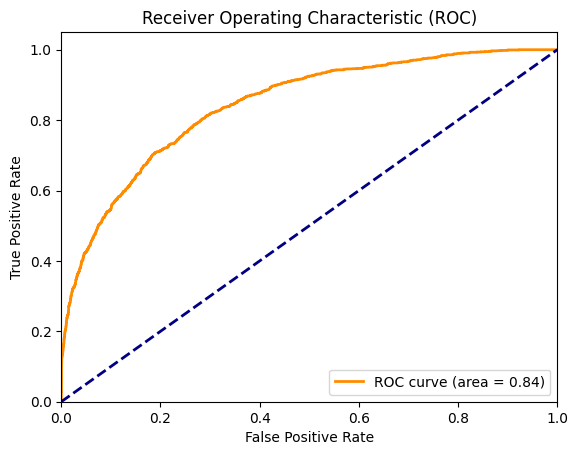

AUC: 0.8423038587029512


In [35]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = log_reg.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)

# **Conclusion**

The goal was to build a logistic regression model to predict whether an individual's income is above or below $50,000 using census data.

Data:

The dataset used was the 1994 Census database.
It contained features like age, workclass, education, marital status, occupation, etc.
Data cleaning was performed, including stripping extra whitespace and handling missing values.
The target variable 'income' had a class imbalance, with a higher proportion of individuals earning less than $50,000.


Methodology:

Logistic Regression was chosen as the modeling technique.
Feature engineering involved creating dummy variables for categorical features like sex, race, and education.
The dataset was split into training and testing sets for model evaluation.
Model performance was evaluated using metrics such as accuracy, confusion matrix, and AUC.


Results:

The Logistic Regression model achieved an accuracy of around 84%.
Feature importance analysis revealed that age, capital gain, capital loss, work hours per week, sex, race, and education level were significant predictors.
The confusion matrix showed the number of true positives, true negatives, false positives, and false negatives.
The AUC (Area Under the ROC Curve) was approximately 0.84, indicating a good model performance.


Key Insights:

There was a noticeable income disparity based on gender and race.
Higher education levels positively influenced income.
Age and work hours per week also had a positive impact on income.